In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.metrics import accuracy_score 

In [269]:
dataframe = pd.read_csv("Spotify_Dataset_V3.csv", delimiter = ";")

In [270]:
dataframe = dataframe.drop_duplicates(subset = ['Title', 'Artists', 'Date'], keep = 'first')
dataframe = dataframe.reset_index(drop = True)
dataframe.head(10)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",29/05/2023,0.668,0.758,-5176.0,0.033,0.483,0.000,0.834,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...
1,2,WHERE SHE GOES,Bad Bunny,29/05/2023,0.652,0.800,-4019.0,0.061,0.143,0.629,0.234,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",29/05/2023,0.812,0.479,-5678.0,0.333,0.213,0.000,0.559,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...
3,4,Cupid - Twin Ver.,FIFTY FIFTY,29/05/2023,0.783,0.592,-8332.0,0.033,0.435,0.000,0.726,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...
4,5,un x100to,"Grupo Frontera, Bad Bunny",29/05/2023,0.569,0.724,-4076.0,0.047,0.228,0.000,0.562,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...
5,6,Flowers,Miley Cyrus,29/05/2023,0.707,0.681,-4325.0,0.067,0.063,0.000,0.646,Artist 1,Miley Cyrus,Nationality 1,United States,Anglo-America,195,195.0,4DHcnVTT87F0zZhRPYmZ3B,https://open.spotify.com/track/4DHcnVTT87F0zZh...
6,7,Daylight,David Kushner,29/05/2023,0.508,0.430,-9475.0,0.034,0.830,0.000,0.324,Artist 1,David Kushner,Nationality 1,United States,Anglo-America,194,194.0,1odExI7RdWc4BT515LTAwj,https://open.spotify.com/track/1odExI7RdWc4BT5...
7,8,Kill Bill,SZA,29/05/2023,0.644,0.735,-5747.0,0.039,0.052,0.144,0.418,Artist 1,SZA,Nationality 1,United States,Anglo-America,193,193.0,1Qrg8KqiBpW07V7PNxwwwL,https://open.spotify.com/track/1Qrg8KqiBpW07V7...
8,9,As It Was,Harry Styles,29/05/2023,0.520,0.731,-5338.0,0.056,0.342,0.001,0.662,Artist 1,Harry Styles,Nationality 1,United Kingdom,Europe,192,192.0,4Dvkj6JhhA12EX05fT7y2e,https://open.spotify.com/track/4Dvkj6JhhA12EX0...
9,10,TQG,"KAROL G, Shakira",29/05/2023,0.720,0.630,-3547.0,0.277,0.673,0.000,0.607,Artist 1,KAROL G,Nationality 1,Colombia,Latin-America,191,95.5,0DWdj2oZMBFSzRsi2Cvfzf,https://open.spotify.com/track/0DWdj2oZMBFSzRs...


In [271]:
subset = dataframe.copy()
subset['Date'] = pd.to_datetime(subset['Date'])
subset = subset.sort_values(by='Date')

# Calculate the maximum and minimum rank for each song
subset['Lowest Rank'] = subset.groupby(['Title', 'Artists'])['Rank'].transform('max')
subset['Highest Rank'] = subset.groupby(['Title', 'Artists'])['Rank'].transform('min')
subset['Date of Lowest Rank'] = subset.groupby(['Title', 'Artists'])['Date'].transform(lambda x: x[x.idxmax()])
subset['Date of Highest Rank'] = subset.groupby(['Title', 'Artists'])['Date'].transform(lambda x: x[x.idxmin()])
subset

/tmp/ipykernel_12813/77613990.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subset['Date'] = pd.to_datetime(subset['Date'])


,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank
470404,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.00,0.248,0.076,0.000,...,United States,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,200,200,2017-01-01,2017-01-01
470275,71,Traicionera,Sebastian Yatra,2017-01-01,0.776,0.669,-4933.00,0.064,0.142,0.000,...,Colombia,Latin-America,130,130.0,5J1c3M4EldCfNxXwrwt8mT,https://open.spotify.com/track/5J1c3M4EldCfNxX...,200,71,2017-08-20,2017-01-01
470274,70,Light It Up (feat. Nyla & Fuse ODG) - Remix,Major Lazer,2017-01-01,0.746,0.877,-3782.00,0.067,0.038,0.001,...,United States,Anglo-America,131,131.0,0L7loeTIg6akW84aEQZpCT,https://open.spotify.com/track/0L7loeTIg6akW84...,200,70,2018-01-01,2017-01-01
470273,69,Controlla,Drake,2017-01-01,0.607,0.476,-11076.00,0.249,0.077,0.000,...,Canada,Anglo-America,132,132.0,6F609ICg9Spjrw1epsAnpa,https://open.spotify.com/track/6F609ICg9Spjrw1...,200,69,2017-04-09,2017-01-01
470272,68,The Greatest (feat. Kendrick Lamar),Sia,2017-01-01,0.668,0.725,-6127.00,0.266,0.010,0.000,...,Australia,Oceania,133,133.0,7xHWNBFm6ObGEQPaUxHuKO,https://open.spotify.com/track/7xHWNBFm6ObGEQP...,198,46,2017-03-25,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,Everybody Wants To Rule The World,Tears For Fears,2023-05-29,0.645,0.795,-12095.00,0.053,0.347,0.004,...,United Kingdom,Europe,71,71.0,4RvWPyQ5RL0ao9LPZeSouE,https://open.spotify.com/track/4RvWPyQ5RL0ao9L...,200,95,2023-05-29,2022-05-31
128,129,Watermelon Sugar,Harry Styles,2023-05-29,0.548,0.816,-4209.00,0.047,0.122,0.000,...,United Kingdom,Europe,72,72.0,6UelLqGlWMcVH1E5c4H7lY,https://open.spotify.com/track/6UelLqGlWMcVH1E...,198,4,2023-05-29,2019-11-17
127,128,Danza Kuduro,"Don Omar, Lucenzo",2023-05-29,0.400,0.915,-4.89,0.280,0.085,0.000,...,Puerto Rico,Latin-America,73,36.5,2a1o6ZejUi8U3wzzOtCOYw,https://open.spotify.com/track/2a1o6ZejUi8U3wz...,198,99,2023-05-29,2017-12-31
137,138,Tití Me Preguntó,Bad Bunny,2023-05-29,0.650,0.715,-5198.00,0.253,0.099,0.000,...,Puerto Rico,Latin-America,63,63.0,1IHWl5LamUGEuP4ozKQSXZ,https://open.spotify.com/track/1IHWl5LamUGEuP4...,141,4,2023-05-29,2022-05-06


## Consider multiple artists

In [124]:
artist_top_ten = {}

for index, row in subset.iterrows():
    artists = row['Artists'].split(", ")  # Split artists by comma and space

    for artist in artists:
        if artist not in artist_top_ten:
            artist_top_ten[artist] = False
        if row["Rank"] <= 10:
            artist_top_ten[artist] = True
        if artist_top_ten[artist] == True:
            subset.at[index, "Previous Popularity"] = 1
        else:
            subset.at[index, "Previous Popularity"] = 0


In [125]:
subset.head(20)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank,Previous Popularity
470404,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,...,Anglo-America,1,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,200,200,2017-01-01,2017-01-01,0.0
470275,71,Traicionera,Sebastian Yatra,2017-01-01,0.776,0.669,-4933.0,0.064,0.142,0.000,...,Latin-America,130,130.0,5J1c3M4EldCfNxXwrwt8mT,https://open.spotify.com/track/5J1c3M4EldCfNxX...,200,71,2017-08-20,2017-01-01,0.0
470274,70,Light It Up (feat. Nyla & Fuse ODG) - Remix,Major Lazer,2017-01-01,0.746,0.877,-3782.0,0.067,0.038,0.001,...,Anglo-America,131,131.0,0L7loeTIg6akW84aEQZpCT,https://open.spotify.com/track/0L7loeTIg6akW84...,200,70,2018-01-01,2017-01-01,0.0
470273,69,Controlla,Drake,2017-01-01,0.607,0.476,-11076.0,0.249,0.077,0.000,...,Anglo-America,132,132.0,6F609ICg9Spjrw1epsAnpa,https://open.spotify.com/track/6F609ICg9Spjrw1...,200,69,2017-04-09,2017-01-01,0.0
470272,68,The Greatest (feat. Kendrick Lamar),Sia,2017-01-01,0.668,0.725,-6127.0,0.266,0.010,0.000,...,Oceania,133,133.0,7xHWNBFm6ObGEQPaUxHuKO,https://open.spotify.com/track/7xHWNBFm6ObGEQP...,198,46,2017-03-25,2017-01-01,0.0
470271,67,Faded,Alan Walker,2017-01-01,0.589,0.651,-5097.0,0.031,0.029,0.000,...,Europe,134,134.0,7gHs73wELdeycvS48JfIos,https://open.spotify.com/track/7gHs73wELdeycvS...,200,67,2017-11-18,2017-01-01,0.0
470270,66,Shaky Shaky,Daddy Yankee,2017-01-01,0.899,0.626,-4228.0,0.292,0.076,0.000,...,Latin-America,135,135.0,58IL315gMSTD37DOZPJ2hf,https://open.spotify.com/track/58IL315gMSTD37D...,198,66,2017-03-12,2017-01-01,0.0
470269,65,Deja Vu,J. Cole,2017-01-01,0.657,0.421,-11378.0,0.412,0.352,0.000,...,Anglo-America,136,136.0,6I6NX6tjGsxFAsIfGzY9lJ,https://open.spotify.com/track/6I6NX6tjGsxFAsI...,190,54,2017-03-10,2017-01-01,0.0
470268,64,Stressed Out,Twenty One Pilots,2017-01-01,0.734,0.637,-5677.0,0.141,0.046,0.000,...,Anglo-America,137,137.0,3CRDbSIZ4r5MsZ0YwxuEkn,https://open.spotify.com/track/3CRDbSIZ4r5MsZ0...,200,63,2021-05-03,2017-01-01,0.0
470267,63,Into You,Ariana Grande,2017-01-01,0.636,0.727,-5852.0,0.106,0.016,0.000,...,Anglo-America,138,138.0,7yHEDfrJNd0zWOfXwydNH0,https://open.spotify.com/track/7yHEDfrJNd0zWOf...,200,63,2019-02-10,2017-01-01,0.0


In [126]:
subset["Previous Popularity"].value_counts()

Previous Popularity
1.0    285389
0.0    185016
Name: count, dtype: int64

## Not Consider Multiple Artists

In [272]:
#not consider multiple artists
artist_top_ten = {}
artist_songs_previous = {}
for index, row in subset.iterrows():
    artist = row['Artists']
    if artist not in artist_top_ten:
        artist_top_ten[artist] = False
    if row["Rank"] <= 10:
        artist_top_ten[artist] = True
    if artist_top_ten[artist] == True:
        subset.at[index, "Previous Popularity"] = 1
    else:
        subset.at[index, "Previous Popularity"] = 0
        
    song = row["Title"]
    
    if artist in artist_songs_previous:
        if song not in artist_songs_previous[artist]:
            number = len(artist_songs_previous[artist])
            subset.at[index, "Number Songs Previous"] = number 
            artist_songs_previous[artist].append(song)
        else:
            number = len(artist_songs_previous[artist])
            subset.at[index, "Number Songs Previous"] = number
    else:
            # If artist is not in the dictionary, create a new entry for the artist
            artist_songs_previous[artist] = [song]
            subset.at[index, "Number Songs Previous"] = 0 
    #else:
        # If artist_songs_previous is None, initialize it with a new entry for the artist
        #artist_songs_previous = {artist: [song]}
        #subset.at[index, "Number Songs Previous"] = 0 


In [283]:
subset.tail(20)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists,Top 10
7781,108,Cartão Black,"MC Caverinha, KayBlack, Wall Hein",2023-05-19,0.842,0.468,-8572.00,0.637,0.255,0.000,...,12YCtLHGk6tP6RbHDHflCs,https://open.spotify.com/track/12YCtLHGk6tP6Rb...,162,79,2023-05-29,2023-05-19,0.0,0.0,3.0,False
7782,100,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Beyoncé, Kendrick Lamar",2023-05-20,0.784,0.700,-5289.00,0.040,0.011,0.000,...,6l8mgVN9Xf1hiDIFGA6CTE,https://open.spotify.com/track/6l8mgVN9Xf1hiDI...,121,43,2023-05-29,2023-05-20,0.0,0.0,2.0,False
7783,173,Así Lo Quiso Dios,"Eslabon Armado, Luis R Conriquez",2023-05-20,0.698,0.664,-4027.00,0.041,0.302,0.000,...,6X5WZbJzXtk6aO03HlxuZ9,https://open.spotify.com/track/6X5WZbJzXtk6aO0...,173,173,2023-05-20,2023-05-20,0.0,0.0,2.0,False
7784,55,Bite Me,ENHYPEN,2023-05-22,0.795,0.781,-4647.00,0.141,0.285,0.000,...,7mpdNiaQvygj2rHoxkzMfa,https://open.spotify.com/track/7mpdNiaQvygj2rH...,96,35,2023-05-29,2023-05-22,0.0,4.0,1.0,False
7785,185,What's Love Got to Do with It - 2015 Remaster,Tina Turner,2023-05-24,0.855,0.480,-8902.00,0.059,0.254,0.000,...,3ErsOxqe2RmXkR65wkygDz,https://open.spotify.com/track/3ErsOxqe2RmXkR6...,185,33,2023-05-26,2023-05-24,0.0,0.0,1.0,False
7786,32,The Best,Tina Turner,2023-05-25,0.662,0.737,-9.54,0.030,0.108,0.019,...,6pPWRBubXOBAHnjl5ZIujB,https://open.spotify.com/track/6pPWRBubXOBAHnj...,130,32,2023-05-26,2023-05-25,0.0,1.0,1.0,False
7787,198,Cosas De La Vida,Eros Ramazzotti,2023-05-25,0.622,0.626,-8822.00,0.028,0.054,0.000,...,0z3Voyxi0FH0SQBc7c4wri,https://open.spotify.com/track/0z3Voyxi0FH0SQB...,198,198,2023-05-25,2023-05-25,0.0,0.0,1.0,False
7788,143,We Don't Need Another Hero (Thunderdome),Tina Turner,2023-05-25,0.690,0.674,-5866.00,0.047,0.200,0.006,...,50XXRUFNjs85P0MjCZ1c9X,https://open.spotify.com/track/50XXRUFNjs85P0M...,143,143,2023-05-25,2023-05-25,0.0,2.0,1.0,False
7789,131,Proud Mary,Tina Turner,2023-05-25,0.397,0.499,-10972.00,0.069,0.077,0.000,...,6gJdDnF2TzfA1WPMXuCa3x,https://open.spotify.com/track/6gJdDnF2TzfA1WP...,131,131,2023-05-25,2023-05-25,0.0,3.0,1.0,False
7790,84,War Bout It (feat. 21 Savage),"Lil Durk, 21 Savage",2023-05-26,0.732,0.600,-9057.00,0.241,0.004,0.000,...,4muwDurKeVOB1WBjTVRWlD,https://open.spotify.com/track/4muwDurKeVOB1WB...,195,84,2023-05-27,2023-05-26,0.0,0.0,2.0,False


In [274]:
subset["Previous Popularity"].value_counts()

Previous Popularity
1.0    240451
0.0    229954
Name: count, dtype: int64

In [275]:
for index, row in subset.iterrows():
    artists = row['Artists'].split(", ")
    subset.at[index, "Number of Artists"] = len(artists)

In [276]:
subset.head(5)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Points (Ind for each Artist/Nat),id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists
470404,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,...,1.0,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,200,200,2017-01-01,2017-01-01,0.0,0.0,2.0
470275,71,Traicionera,Sebastian Yatra,2017-01-01,0.776,0.669,-4933.0,0.064,0.142,0.000,...,130.0,5J1c3M4EldCfNxXwrwt8mT,https://open.spotify.com/track/5J1c3M4EldCfNxX...,200,71,2017-08-20,2017-01-01,0.0,0.0,1.0
470274,70,Light It Up (feat. Nyla & Fuse ODG) - Remix,Major Lazer,2017-01-01,0.746,0.877,-3782.0,0.067,0.038,0.001,...,131.0,0L7loeTIg6akW84aEQZpCT,https://open.spotify.com/track/0L7loeTIg6akW84...,200,70,2018-01-01,2017-01-01,0.0,0.0,1.0
470273,69,Controlla,Drake,2017-01-01,0.607,0.476,-11076.0,0.249,0.077,0.000,...,132.0,6F609ICg9Spjrw1epsAnpa,https://open.spotify.com/track/6F609ICg9Spjrw1...,200,69,2017-04-09,2017-01-01,0.0,0.0,1.0
470272,68,The Greatest (feat. Kendrick Lamar),Sia,2017-01-01,0.668,0.725,-6127.0,0.266,0.010,0.000,...,133.0,7xHWNBFm6ObGEQPaUxHuKO,https://open.spotify.com/track/7xHWNBFm6ObGEQP...,198,46,2017-03-25,2017-01-01,0.0,0.0,1.0


# Prepare Data for Model

In [277]:
subset['Top 10'] = subset['Highest Rank'].apply(lambda x: True if x <= 1 else False)
subset

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists,Top 10
470404,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.00,0.248,0.076,0.000,...,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,200,200,2017-01-01,2017-01-01,0.0,0.0,2.0,False
470275,71,Traicionera,Sebastian Yatra,2017-01-01,0.776,0.669,-4933.00,0.064,0.142,0.000,...,5J1c3M4EldCfNxXwrwt8mT,https://open.spotify.com/track/5J1c3M4EldCfNxX...,200,71,2017-08-20,2017-01-01,0.0,0.0,1.0,False
470274,70,Light It Up (feat. Nyla & Fuse ODG) - Remix,Major Lazer,2017-01-01,0.746,0.877,-3782.00,0.067,0.038,0.001,...,0L7loeTIg6akW84aEQZpCT,https://open.spotify.com/track/0L7loeTIg6akW84...,200,70,2018-01-01,2017-01-01,0.0,0.0,1.0,False
470273,69,Controlla,Drake,2017-01-01,0.607,0.476,-11076.00,0.249,0.077,0.000,...,6F609ICg9Spjrw1epsAnpa,https://open.spotify.com/track/6F609ICg9Spjrw1...,200,69,2017-04-09,2017-01-01,0.0,0.0,1.0,False
470272,68,The Greatest (feat. Kendrick Lamar),Sia,2017-01-01,0.668,0.725,-6127.00,0.266,0.010,0.000,...,7xHWNBFm6ObGEQPaUxHuKO,https://open.spotify.com/track/7xHWNBFm6ObGEQP...,198,46,2017-03-25,2017-01-01,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,Everybody Wants To Rule The World,Tears For Fears,2023-05-29,0.645,0.795,-12095.00,0.053,0.347,0.004,...,4RvWPyQ5RL0ao9LPZeSouE,https://open.spotify.com/track/4RvWPyQ5RL0ao9L...,200,95,2023-05-29,2022-05-31,0.0,1.0,1.0,False
128,129,Watermelon Sugar,Harry Styles,2023-05-29,0.548,0.816,-4209.00,0.047,0.122,0.000,...,6UelLqGlWMcVH1E5c4H7lY,https://open.spotify.com/track/6UelLqGlWMcVH1E...,198,4,2023-05-29,2019-11-17,1.0,35.0,1.0,False
127,128,Danza Kuduro,"Don Omar, Lucenzo",2023-05-29,0.400,0.915,-4.89,0.280,0.085,0.000,...,2a1o6ZejUi8U3wzzOtCOYw,https://open.spotify.com/track/2a1o6ZejUi8U3wz...,198,99,2023-05-29,2017-12-31,0.0,1.0,2.0,False
137,138,Tití Me Preguntó,Bad Bunny,2023-05-29,0.650,0.715,-5198.00,0.253,0.099,0.000,...,1IHWl5LamUGEuP4ozKQSXZ,https://open.spotify.com/track/1IHWl5LamUGEuP4...,141,4,2023-05-29,2022-05-06,1.0,53.0,1.0,False


In [278]:
subset = subset.drop_duplicates(subset = ['Title', 'Artists'], keep = 'first')
subset = subset.reset_index(drop = True)

subset

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists,Top 10
0,200,Ni**as In Paris,"JAY-Z, Kanye West",2017-01-01,0.757,0.882,-6125.0,0.248,0.076,0.000,...,2KpCpk6HjXXLb7nnXoXA5O,https://open.spotify.com/track/2KpCpk6HjXXLb7n...,200,200,2017-01-01,2017-01-01,0.0,0.0,2.0,False
1,71,Traicionera,Sebastian Yatra,2017-01-01,0.776,0.669,-4933.0,0.064,0.142,0.000,...,5J1c3M4EldCfNxXwrwt8mT,https://open.spotify.com/track/5J1c3M4EldCfNxX...,200,71,2017-08-20,2017-01-01,0.0,0.0,1.0,False
2,70,Light It Up (feat. Nyla & Fuse ODG) - Remix,Major Lazer,2017-01-01,0.746,0.877,-3782.0,0.067,0.038,0.001,...,0L7loeTIg6akW84aEQZpCT,https://open.spotify.com/track/0L7loeTIg6akW84...,200,70,2018-01-01,2017-01-01,0.0,0.0,1.0,False
3,69,Controlla,Drake,2017-01-01,0.607,0.476,-11076.0,0.249,0.077,0.000,...,6F609ICg9Spjrw1epsAnpa,https://open.spotify.com/track/6F609ICg9Spjrw1...,200,69,2017-04-09,2017-01-01,0.0,0.0,1.0,False
4,68,The Greatest (feat. Kendrick Lamar),Sia,2017-01-01,0.668,0.725,-6127.0,0.266,0.010,0.000,...,7xHWNBFm6ObGEQPaUxHuKO,https://open.spotify.com/track/7xHWNBFm6ObGEQP...,198,46,2017-03-25,2017-01-01,0.0,0.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7796,171,Bye,Peso Pluma,2023-05-26,0.782,0.812,-6613.0,0.047,0.567,0.000,...,6n2P81rPk2RTzwnNNgFOdb,https://open.spotify.com/track/6n2P81rPk2RTzwn...,171,85,2023-05-29,2023-05-26,0.0,1.0,1.0,False
7797,184,Stand By Me (feat. Morgan Wallen),"Lil Durk, Morgan Wallen",2023-05-26,0.756,0.582,-7726.0,0.034,0.059,0.000,...,1fXnu2HzxbDtoyvFPWG3Bw,https://open.spotify.com/track/1fXnu2HzxbDtoyv...,199,184,2023-05-27,2023-05-26,0.0,1.0,2.0,False
7798,149,Friesenjung,"Ski Aggu, Joost, Otto Waalkes",2023-05-26,0.790,0.979,-4637.0,0.117,0.018,0.000,...,6tAKikIvnoWfUeZrfkopLL,https://open.spotify.com/track/6tAKikIvnoWfUeZ...,149,149,2023-05-26,2023-05-26,0.0,0.0,3.0,False
7799,176,"Phir Aur Kya Chahiye (From ""Zara Hatke Zara Ba...","Sachin-Jigar, Arijit Singh, Amitabha Bhattacharya",2023-05-27,0.556,0.552,-5875.0,0.037,0.531,0.000,...,5QW9K4A1gMnIi94YUxtsfM,https://open.spotify.com/track/5QW9K4A1gMnIi94...,176,123,2023-05-29,2023-05-27,0.0,0.0,3.0,False


In [279]:
subset = subset[subset['Date'] >= "2017-02-01"]
subset.head(10)

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,id,Song URL,Lowest Rank,Highest Rank,Date of Lowest Rank,Date of Highest Rank,Previous Popularity,Number Songs Previous,Number of Artists,Top 10
300,197,I Miss You,"Grey, Bahari",2017-02-01,0.650,0.764,-5219.0,0.094,0.368,0.000,...,1sl5tSzfK1JrcQIcA8rYDy,https://open.spotify.com/track/1sl5tSzfK1JrcQI...,199,175,2017-03-01,2017-02-01,0.0,0.0,2.0,False
301,188,Location,Khalid,2017-02-01,0.736,0.449,-11462.0,0.425,0.330,0.000,...,152lZdxL1OR0ZMW6KquMif,https://open.spotify.com/track/152lZdxL1OR0ZMW...,200,33,2018-10-30,2017-02-01,0.0,0.0,1.0,False
302,199,Magic,"Thomas Gold, Jillian Edwards",2017-02-01,0.629,0.882,-5231.0,0.045,0.050,0.001,...,5abwHwUhywLGNli5NDcEN7,https://open.spotify.com/track/5abwHwUhywLGNli...,200,168,2017-03-02,2017-02-01,0.0,0.0,2.0,False
303,179,Body Like A Back Road,Sam Hunt,2017-02-02,0.732,0.458,-7225.0,0.031,0.447,0.000,...,7mldq42yDuxiUNn08nvzHO,https://open.spotify.com/track/7mldq42yDuxiUNn...,199,55,2018-07-04,2017-02-02,0.0,0.0,1.0,False
304,165,Believer,Imagine Dragons,2017-02-02,0.779,0.787,-4305.0,0.108,0.052,0.000,...,0CcQNd8CINkwQfe1RDtGV6,https://open.spotify.com/track/0CcQNd8CINkwQfe...,197,15,2023-05-29,2017-02-02,0.0,1.0,1.0,False
305,181,Inspire Me,Big Sean,2017-02-03,0.713,0.664,-7245.0,0.264,0.336,0.000,...,7M62jxrvr7UJdo6DchAFf3,https://open.spotify.com/track/7M62jxrvr7UJdo6...,194,181,2017-02-04,2017-02-03,0.0,2.0,1.0,False
306,74,Halfway Off The Balcony,Big Sean,2017-02-03,0.525,0.804,-6453.0,0.250,0.329,0.000,...,4atJ40xfasjdM9ZF3p07BV,https://open.spotify.com/track/4atJ40xfasjdM9Z...,154,74,2017-02-10,2017-02-03,0.0,3.0,1.0,False
307,161,Intro,Big Sean,2017-02-03,0.388,0.807,-9283.0,0.159,0.877,0.000,...,35k5ePiDMMdacA7jIF9RFY,https://open.spotify.com/track/35k5ePiDMMdacA7...,161,161,2017-02-03,2017-02-03,0.0,4.0,1.0,False
308,87,Light,"Big Sean, Jeremih",2017-02-03,0.505,0.611,-5976.0,0.065,0.826,0.000,...,0URaKGzNTtzKRtsJN1RkA9,https://open.spotify.com/track/0URaKGzNTtzKRts...,195,87,2017-02-07,2017-02-03,0.0,0.0,2.0,False
309,90,Jump Out The Window,Big Sean,2017-02-03,0.747,0.704,-6743.0,0.099,0.136,0.000,...,1jQsKN68yE94tMYml0wHMd,https://open.spotify.com/track/1jQsKN68yE94tMY...,190,85,2017-02-11,2017-02-03,0.0,5.0,1.0,False


In [280]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_var = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Valence", 
         "Previous Popularity", "Number of Artists", "Number Songs Previous"]

X = subset[x_var]
y = subset["Top 10"]

# Use SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=1, random_state=42)
X,y = smote.fit_resample(X,y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [259]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report


# Create a GradientBoostingClassifier model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9325008437394533
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.90      0.93      1473
        True       0.91      0.96      0.93      1490

    accuracy                           0.93      2963
   macro avg       0.93      0.93      0.93      2963
weighted avg       0.93      0.93      0.93      2963



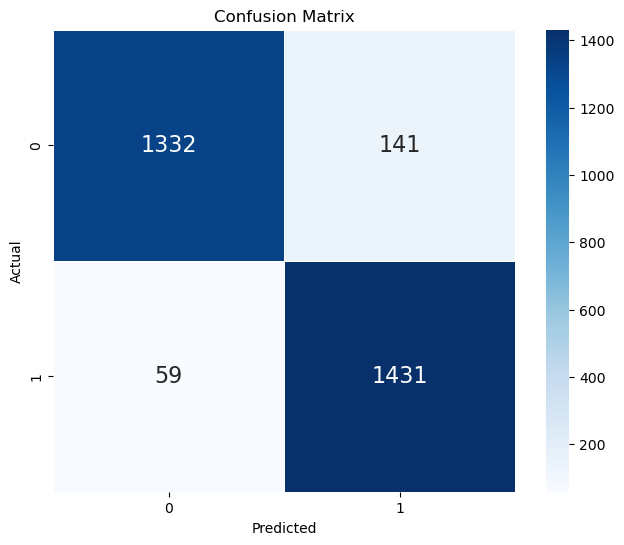

In [260]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16}, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [261]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.9323398351535697

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your feature matrix X and target variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
r = roc_auc_score(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC_AUC_SCORE: " + str(r))

Accuracy: 0.7721903476206547
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.73      0.76      1473
        True       0.75      0.82      0.78      1490

    accuracy                           0.77      2963
   macro avg       0.77      0.77      0.77      2963
weighted avg       0.77      0.77      0.77      2963

ROC_AUC_SCORE: 0.7719330499323391


In [263]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier(enable_categorial=True)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)



[20:02:19] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "enable_categorial" } are not used.

Accuracy: 0.9868376645291934


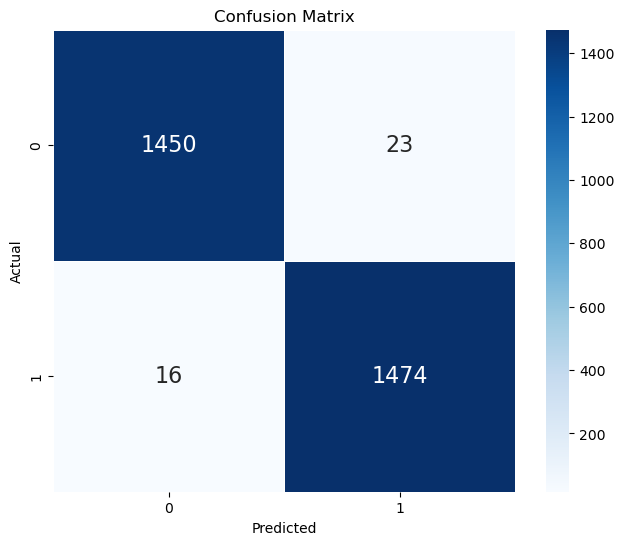

In [264]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16}, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [265]:
 roc_auc_score(y_test, y_pred)

0.9868236762849866

In [281]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier model
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to your training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.989875126560918
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      1473
        True       0.99      0.99      0.99      1490

    accuracy                           0.99      2963
   macro avg       0.99      0.99      0.99      2963
weighted avg       0.99      0.99      0.99      2963

Confusion Matrix:
 [[1459   14]
 [  16 1474]]


In [282]:
 roc_auc_score(y_test, y_pred)

0.9898786661016872

In [132]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Define your parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy Score: 0.8829390947020708
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_e

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_e

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   7.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   8.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   5.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   8.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_esti

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estima

In [110]:
params = [5, 10, 20, 30, 40, 50, 75, 100]
acc = []
for num in params:
    dataframe = pd.read_csv("Spotify_Dataset_V3.csv", delimiter = ";")

    dataframe = dataframe.drop_duplicates(subset = ['Title', 'Artists', 'Date'], keep = 'first')
    dataframe = dataframe.reset_index(drop = True)
    subset = dataframe.copy()
    subset['Date'] = pd.to_datetime(subset['Date'])
    subset = subset.sort_values(by='Date')

    # Calculate the maximum and minimum rank for each song
    subset['Lowest Rank'] = subset.groupby(['Title', 'Artists'])['Rank'].transform('max')
    subset['Highest Rank'] = subset.groupby(['Title', 'Artists'])['Rank'].transform('min')
    subset['Date of Lowest Rank'] = subset.groupby(['Title', 'Artists'])['Date'].transform(lambda x: x[x.idxmax()])
    subset['Date of Highest Rank'] = subset.groupby(['Title', 'Artists'])['Date'].transform(lambda x: x[x.idxmin()])

    artist_top_ten = {}
    for index, row in subset.iterrows():
        artist = row['Artists']
        if artist not in artist_top_ten: artist_top_ten[artist] = False
        if row["Rank"] <= 10: artist_top_ten[artist] = True
        if artist_top_ten[artist] == True: subset.at[index, "Previous Popularity"] = 1
        else: subset.at[index, "Previous Popularity"] = 0

    subset['Top 10'] = subset['Highest Rank'].apply(lambda x: True if x <= 10 else False)

    subset = subset.drop_duplicates(subset = ['Title', 'Artists'], keep = 'first')
    subset = subset.reset_index(drop = True)
    
    model = RandomForestClassifier(n_estimators=300, random_state=42)

# Split your data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to your training data
    model.fit(X_train, y_train)

# Make predictions on the test data
    y_pred = model.predict(X_test)

# Evaluate the model
    acc.append(accuracy_score(y_test, y_pred))


/tmp/ipykernel_12813/2577295952.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subset['Date'] = pd.to_datetime(subset['Date'])
/tmp/ipykernel_12813/2577295952.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subset['Date'] = pd.to_datetime(subset['Date'])
/tmp/ipykernel_12813/2577295952.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subset['Date'] = pd.to_datetime(subset['Date'])
/tmp/ipykernel_12813/2577295952.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  subset['Date'] = pd.to_datetime(subset['Date'])
/tmp

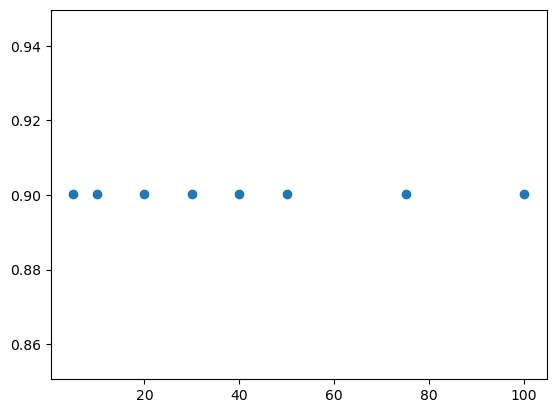

In [111]:
plt.scatter(params, acc)